In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters:

num_of_agents = 100 # number of agents
Timesteps = 500 # timesteps
R = 0.2 # confidence bound

min_age = 16
max_age = 80
op_drift_old = 0.02
op_drift_young = 0.01

youth_min_op = 0
youth_max_op = 0.4

In [3]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]
ages = np.random.randint(min_age,max_age, size=num_of_agents) 

In [4]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [5]:
# Running model

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions

# Initialising matrix of ages over time
ages_over_time = np.zeros((Timesteps,num_of_agents))
ages_over_time[0,:] = ages


for t in range(Timesteps-1):
    
    # Compute age-dependent drift
    drift = np.zeros(num_of_agents)
    drift[ages_over_time[t, :] < 40] = - op_drift_young      # young drift down
    drift[ages_over_time[t, :] > 55] = + op_drift_old     # old drift up

    # Update opinion
    opinions_over_time[t+1,:] = np.maximum(np.minimum(get_A(opinions_over_time[t, :], R) + drift, 1.0), 0)

    # Update ages
    ages_over_time[t+1,:] = ages_over_time[t,:] + 1
    
    # Find who dies at next step
    deaths = ages_over_time[t+1,:] >= max_age
    num_deaths = sum(deaths)

    # Replace the people who die with young people
    ages_over_time[t+1, deaths] = min_age

    # Initialise new people with uniformly distributed opinions within some range
    opinions_over_time[t+1,:][deaths] = (youth_max_op - youth_min_op) * np.random.random(num_deaths) + youth_min_op 
    

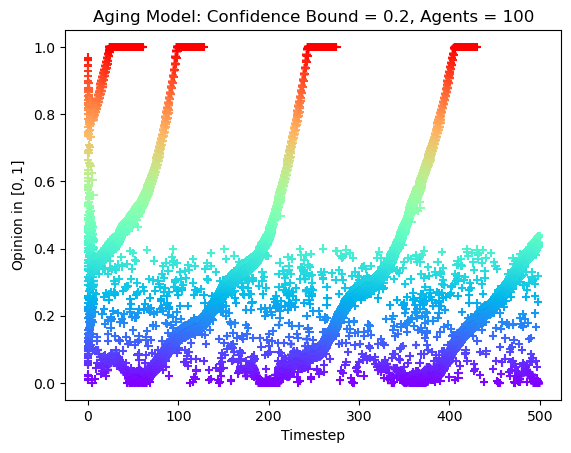

In [6]:
#plotting

colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=opinions_over_time, cmap='rainbow', marker='+')
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Timestep')
plt.ylabel('Opinion in $[0,1]$')
plt.show()
